In [19]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [15]:
pip install skopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [17]:
pip install scikit-optimize


   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.8 kB ? eta -:--:--
   ------------------------------------- -- 102.4/107.8 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 107.8/107.8 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
data = pd.read_csv('heartdisease.csv')
cardio = data
cardio


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [27]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [29]:
cardio.shape

(253680, 22)

In [31]:
cardio['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [33]:
cardio.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

In [35]:
cardio.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [37]:
X = cardio.iloc[:, 1:].values # get all record, for each record get all column exclude the first (label) column => independent variable
y = cardio.iloc[:, 0].values # get all record, for each record only get the first column => dependent variable or the label need predict

In [39]:

y

array([0., 0., 0., ..., 0., 0., 1.])

In [41]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
X.shape

(253680, 21)

In [45]:
y.shape

(253680,)

In [47]:
# split the dataset to the train and test set, prepare for training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


In [49]:
results = {}

In [51]:
%%time
training_start_time = time.time()

logistic_model = LogisticRegression() # call model from lib
logistic_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = logistic_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Logistic Regression model'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: total: 2.36 s
Wall time: 2.26 s


In [53]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x000001A5F5BF4360>
accuracy:  90.6874802901293
precision:  87.76020911868257
recall:  90.6874802901293
f1_score:  88.07114477753404
training time total:  2.1771228313446045


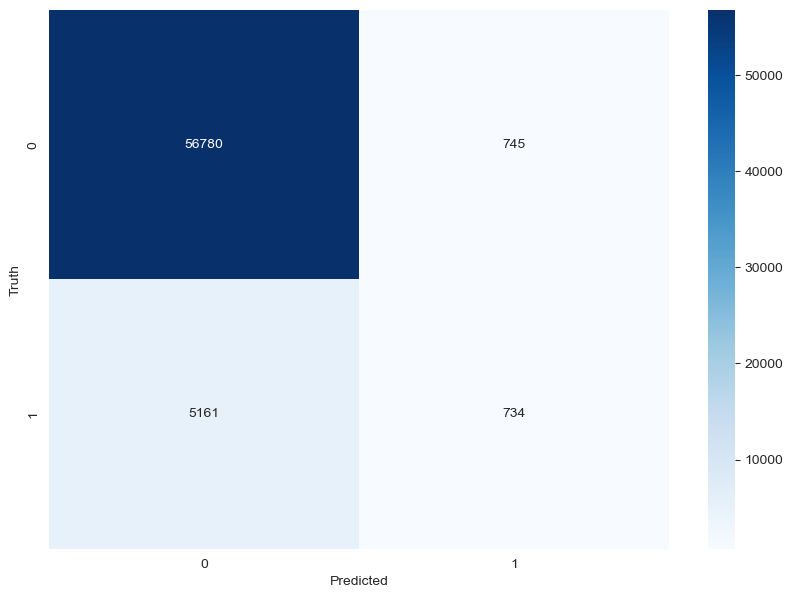

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

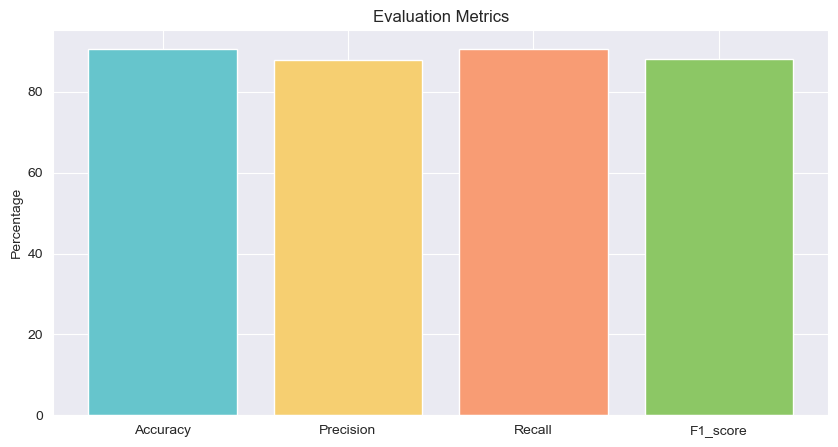

In [57]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [59]:
### 1. Logistic regresssion model
print("Completed")

Completed


In [61]:
%%time
training_start_time = time.time()

knn_model = KNeighborsClassifier() # call model from lib
knn_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = knn_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: total: 40.2 s
Wall time: 42.3 s


In [63]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x000001A5F5BF4360>
accuracy:  89.51907915484074
precision:  85.73001659295366
recall:  89.51907915484074
f1_score:  87.04792789537787
training time total:  42.24302959442139


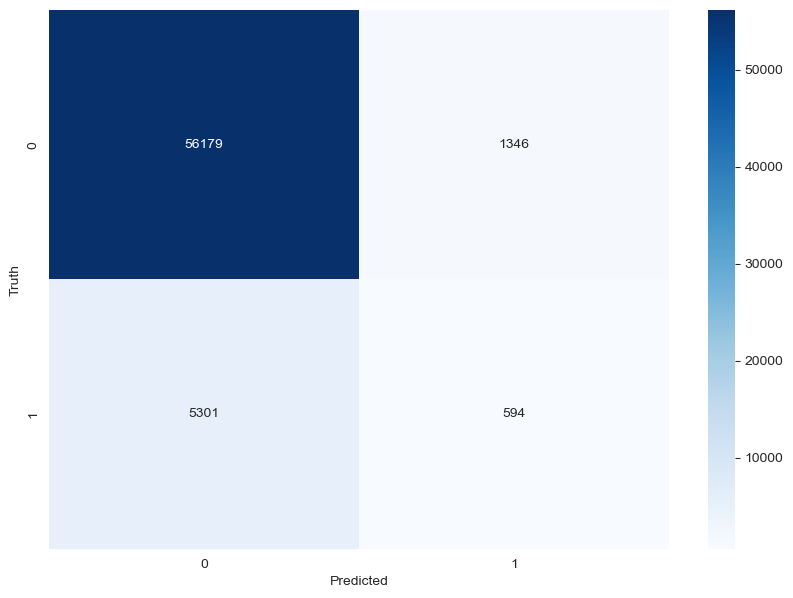

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

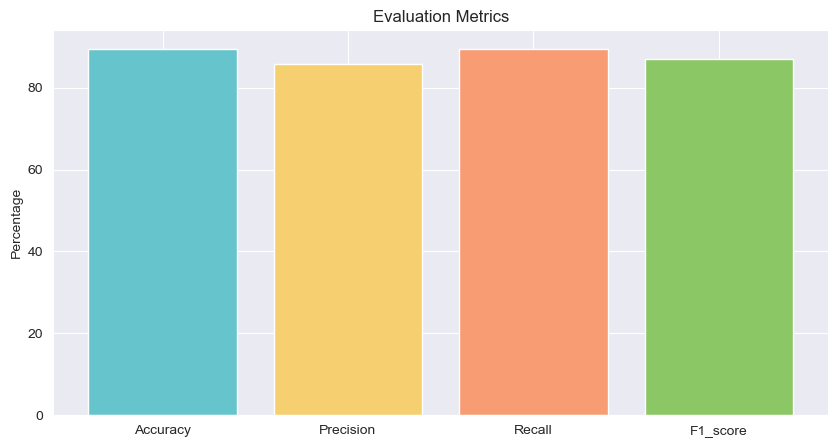

In [67]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [69]:
### 2. k Nearest Neighbors (k-NN)
print('Completed')

Completed


In [71]:
%%time
training_start_time = time.time()

decision_tree_model = DecisionTreeClassifier() # call model from lib
decision_tree_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = decision_tree_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Desision Tree'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: total: 1.12 s
Wall time: 1.75 s


In [73]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x000001A5F5BF4360>
accuracy:  85.12614317250079
precision:  86.0805926769268
recall:  85.12614317250079
f1_score:  85.58679696349586
training time total:  1.6847164630889893


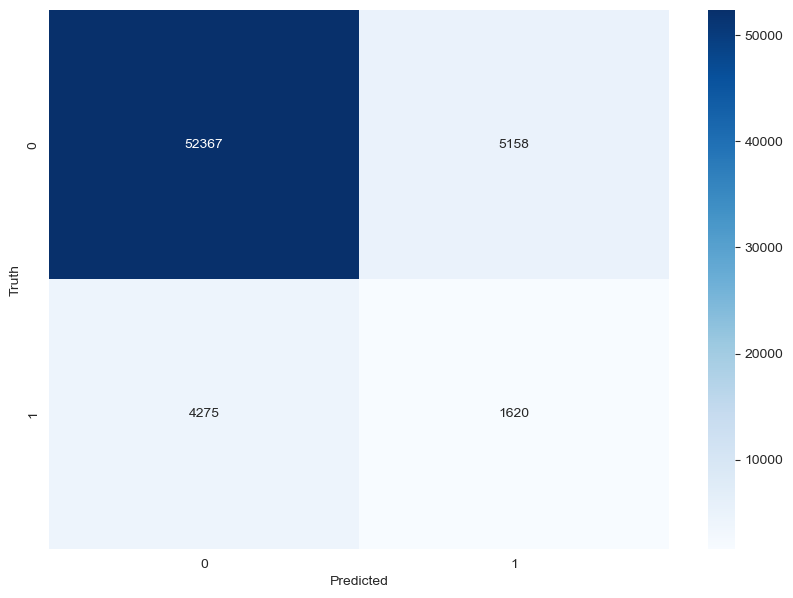

In [75]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

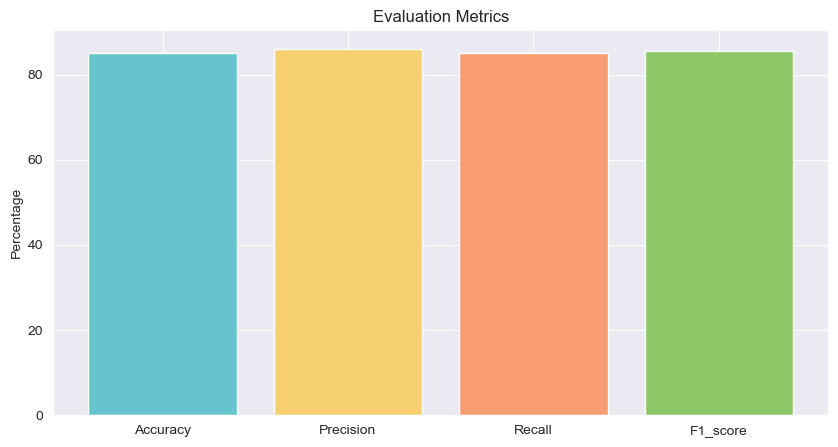

In [77]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [79]:
### 3. Decision Tree
print('Completed')

Completed


In [81]:
%%time
training_start_time = time.time()

random_forest_model = RandomForestClassifier() # call model from lib
random_forest_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = random_forest_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Random forest'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: total: 17.3 s
Wall time: 36.7 s


In [83]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x000001A5F5BF4360>
accuracy:  90.31220435193946
precision:  86.87630573034214
recall:  90.31220435193946
f1_score:  87.62465316844155
training time total:  36.604472160339355


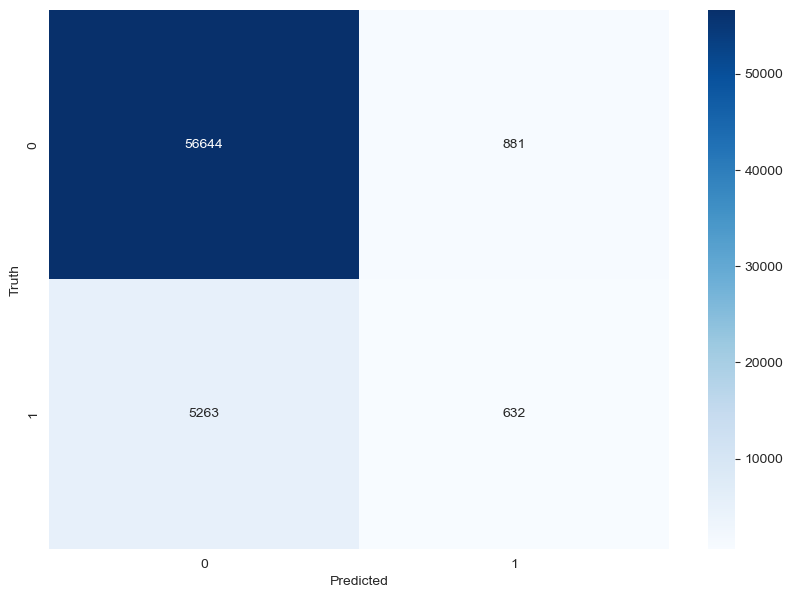

In [85]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

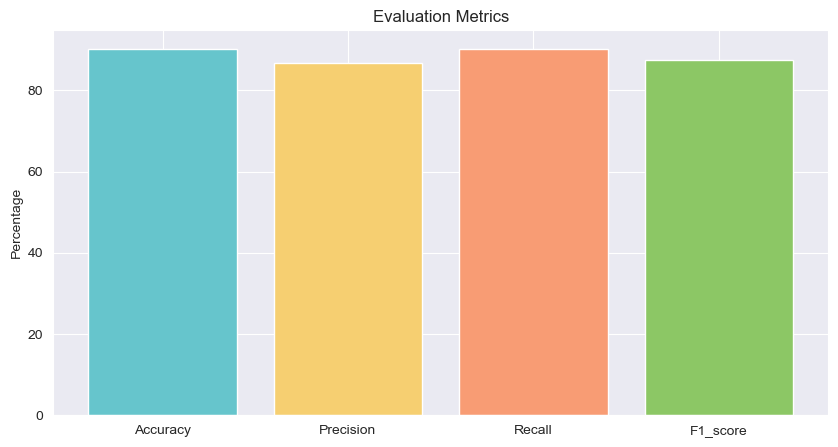

In [87]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [89]:
### 4. Random forest
print('Completed')

Completed


In [91]:
%%time
training_start_time = time.time()

neural_network_model = MLPClassifier() # call model from lib
neural_network_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = neural_network_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Neural Networks (Multi-layer Perceptron)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: total: 3min 3s
Wall time: 4min 5s


In [93]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x000001A5F5BF4360>
accuracy:  90.77578051087984
precision:  88.02729731522018
recall:  90.77578051087984
f1_score:  88.27544856131925
training time total:  244.98445463180542


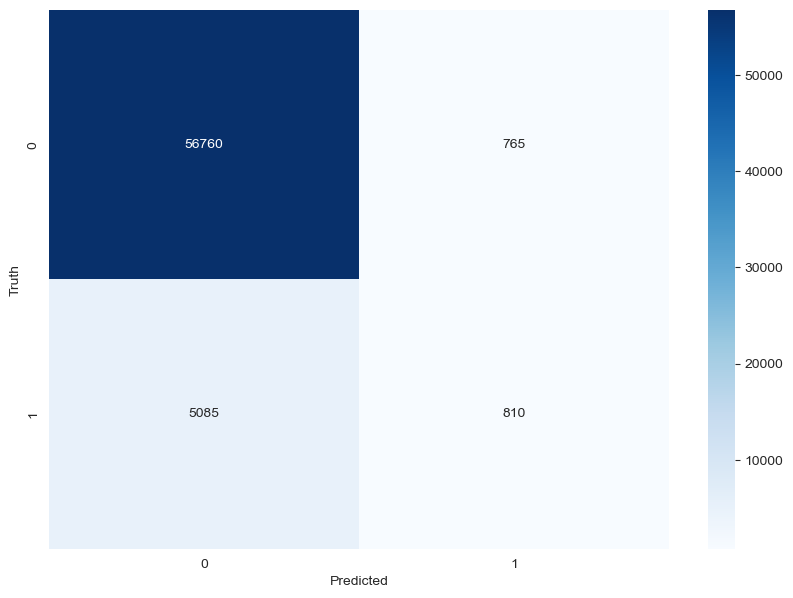

In [95]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

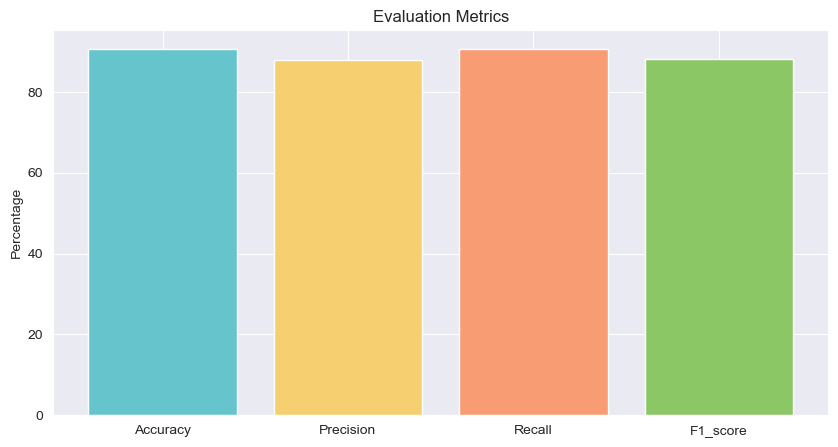

In [97]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()